In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [4]:
(Xtr,Ytr),(Xte,Yte) = tf.keras.datasets.cifar10.load_data()

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

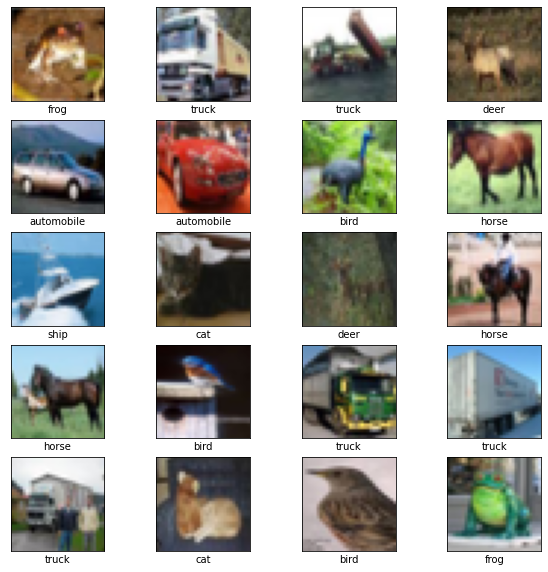

In [15]:
#plot images
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Xtr[i])
    plt.xlabel(class_names[Ytr[i][0]])

In [38]:
# let us consider the kernel size to be 3x3 and total 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64 , activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [40]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
)

In [41]:
model.fit(Xtr,Ytr,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7672 - accuracy: 0.3801
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3292 - accuracy: 0.5268
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1795 - accuracy: 0.5837
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0761 - accuracy: 0.6231
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9843 - accuracy: 0.6569
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9171 - accuracy: 0.6797
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8496 - accuracy: 0.7044
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7930 - accuracy: 0.7223
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7510 - accuracy: 0.7378
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [42]:
pred = model.predict(Xte)

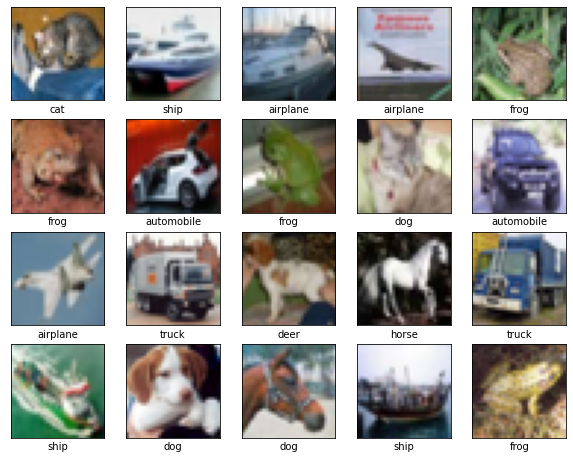

In [43]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Xte[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[np.argmax(pred[i])])
    